# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# Step 2: set up the time and solution arrays
times = np.linspace(0, 20, int(20/dt)+1,endpoint=True)
posx = np.zeros(len(times))     # create array with elements all are 0
velx = np.zeros(len(times))

# Step 3: set up the initial conditions
posx[0] = 1
velx[0] = 0

# Step 4: solve the difference equation using the Euler method
for i in range(1,len(times)):
    posx[i] = posx[i-1] + velx[i-1]*dt                  # x = x + v*t
    velx[i] = velx[i-1] - (omega0**2)*posx[i-1]*dt      # v = v + a*t (順序會有差)


Text(0.5, 1.0, 'Simple Harmonic Motion')

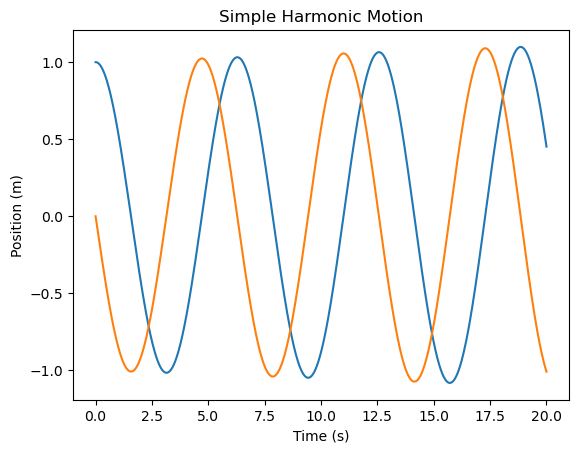

In [39]:
# Step 5: plot the solution

plt.plot(times,posx)
plt.plot(times,velx)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()


We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

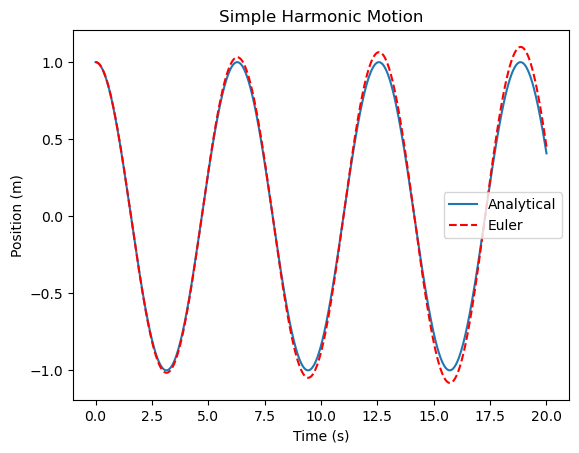

In [37]:
# Step 6: evaluate the analytical solution and plot it

posx_analytical = A*np.cos(omega0*times)
plt.plot(times,posx_analytical,'-',label='Analytical')
plt.plot(times,posx,'r--',label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()


Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

Text(0.5, 1.0, 'Energy of the System')

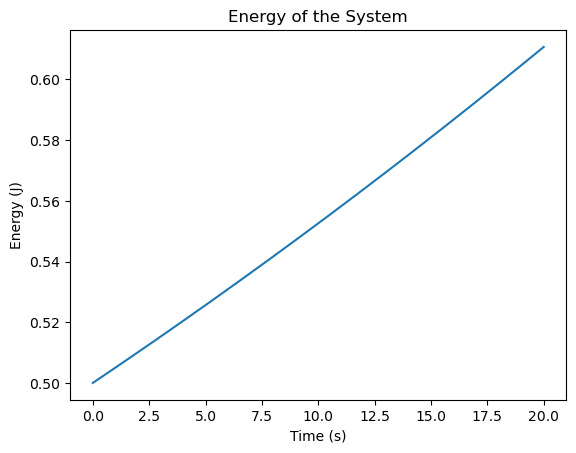

In [43]:
# Step 7: evaluate the energy (error) of the system

energy = 0.5*m*velx**2 + 0.5*k*posx**2

plt.plot(times,energy)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the System')

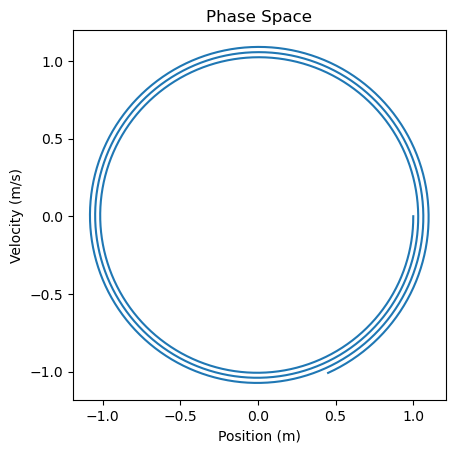

In [42]:
# Step 8: evaluate the phase space

plt.figure()
plt.plot(posx,velx)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase Space')
plt.show()


## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

In [44]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.001

# Step 2: set up the time and solution arrays
times = np.linspace(0, 20, int(20/dt)+1,endpoint=True)
posx = np.zeros(len(times))     # create array with elements all are 0
velx = np.zeros(len(times))

# Step 3: set up the initial conditions
posx[0] = 1
velx[0] = 0

# Step 4: solve the difference equation using the Euler method
for i in range(1,len(times)):
    posx[i] = posx[i-1] + velx[i-1]*dt                  # x = x + v*t
    velx[i] = velx[i-1] - (omega0**2)*posx[i-1]*dt      # v = v + a*t (順序會有差)

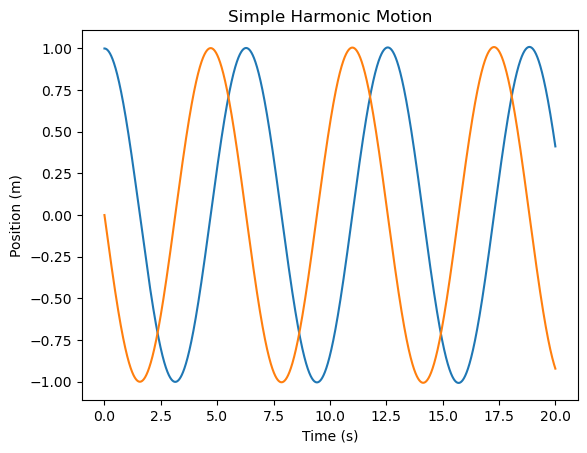

In [45]:
# Step 5: plot the solution

plt.plot(times,posx)
plt.plot(times,velx)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()


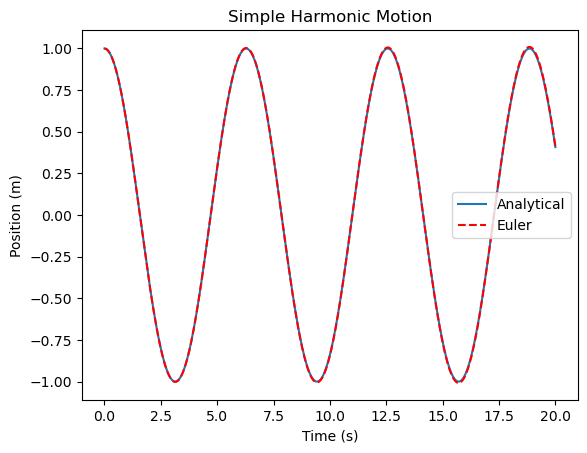

In [46]:
# Step 6: evaluate the analytical solution and plot it

posx_analytical = A*np.cos(omega0*times)
plt.plot(times,posx_analytical,'-',label='Analytical')
plt.plot(times,posx,'r--',label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()

# smaller dt increase accuracy when larger t in this case

### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 